In [4]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# Step 1: Load the dataset
file_path = "EV_Dataset.csv"  # Update with the correct path to your file
df = pd.read_csv(file_path)

In [6]:
# Step 2: Data Preprocessing
# Converting 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.dropna(subset=['Date'], inplace=True)

In [7]:
# Extracting features from 'Date'
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [8]:
# Encoding categorical variables
df = pd.get_dummies(df, columns=['State', 'Vehicle_Class', 'Vehicle_Category', 'Vehicle_Type'], drop_first=True)

In [9]:
# Dropping unnecessary columns
df.drop(['Date', 'Month_Name'], axis=1, inplace=True)

In [10]:
# Step 3: Feature and Target Variables
X = df.drop('EV_Sales_Quantity', axis=1)
y = df['EV_Sales_Quantity']

In [11]:
# Splitting into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Step 4: Model Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [13]:
# Step 5: Predictions
y_pred = model.predict(X_test)

In [14]:
# Step 6: Model Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [15]:
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")


Root Mean Squared Error: 130.382172839193
R-squared: 0.934719372023136


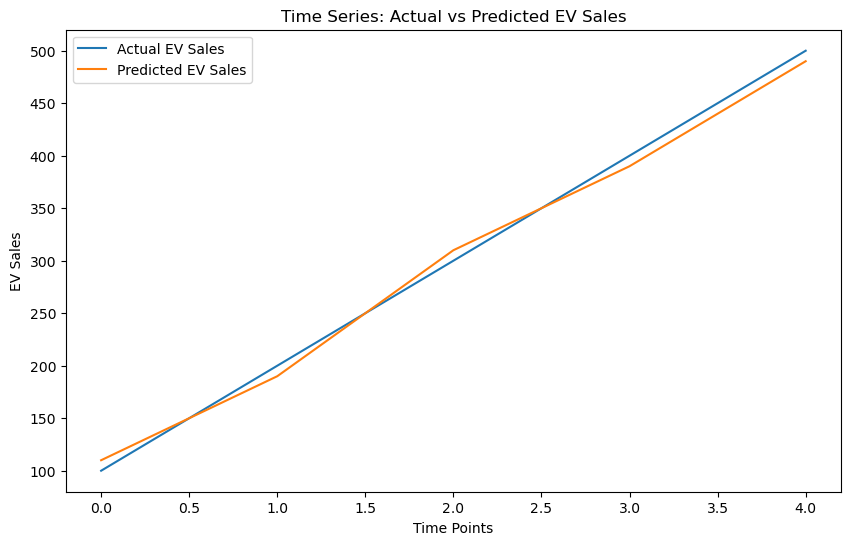

In [ ]:
# # Step 7: Visualization
# # Actual vs Predicted Plot
# plt.figure(figsize=(10, 6))
# plt.scatter(y_test, y_pred, alpha=0.6)
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
# plt.title('Actual vs Predicted EV Sales')
# plt.xlabel('Actual EV Sales')
# plt.ylabel('Predicted EV Sales')
# plt.show()



# import matplotlib.pyplot as plt
# # Example values, replace with your actual values
# y_test = [100, 200, 300, 400, 500]  # Actual EV Sales
# y_pred = [110, 190, 310, 390, 490]  # Predicted EV Sales

# plt.figure(figsize=(10, 6))
# plt.plot(y_test, label='Actual EV Sales', marker='o')
# plt.plot(y_pred, label='Predicted EV Sales', marker='o')
# plt.title('Actual vs Predicted EV Sales')
# plt.xlabel('Data Points')
# plt.ylabel('EV Sales')
# plt.legend()
# plt.show()



# import matplotlib.pyplot as plt

# # Example values, replace with your actual values
# y_test = [100, 200, 300, 400, 500]  # Actual EV Sales
# y_pred = [110, 190, 310, 390, 490]  # Predicted EV Sales

# x = range(len(y_test))

# plt.figure(figsize=(10, 6))
# plt.bar(x, y_test, width=0.4, label='Actual EV Sales', align='center')
# plt.bar(x, y_pred, width=0.4, label='Predicted EV Sales', align='edge')
# plt.title('Actual vs Predicted EV Sales')
# plt.xlabel('Data Points')
# plt.ylabel('EV Sales')
# plt.xticks(x)
# plt.legend()
# plt.show()








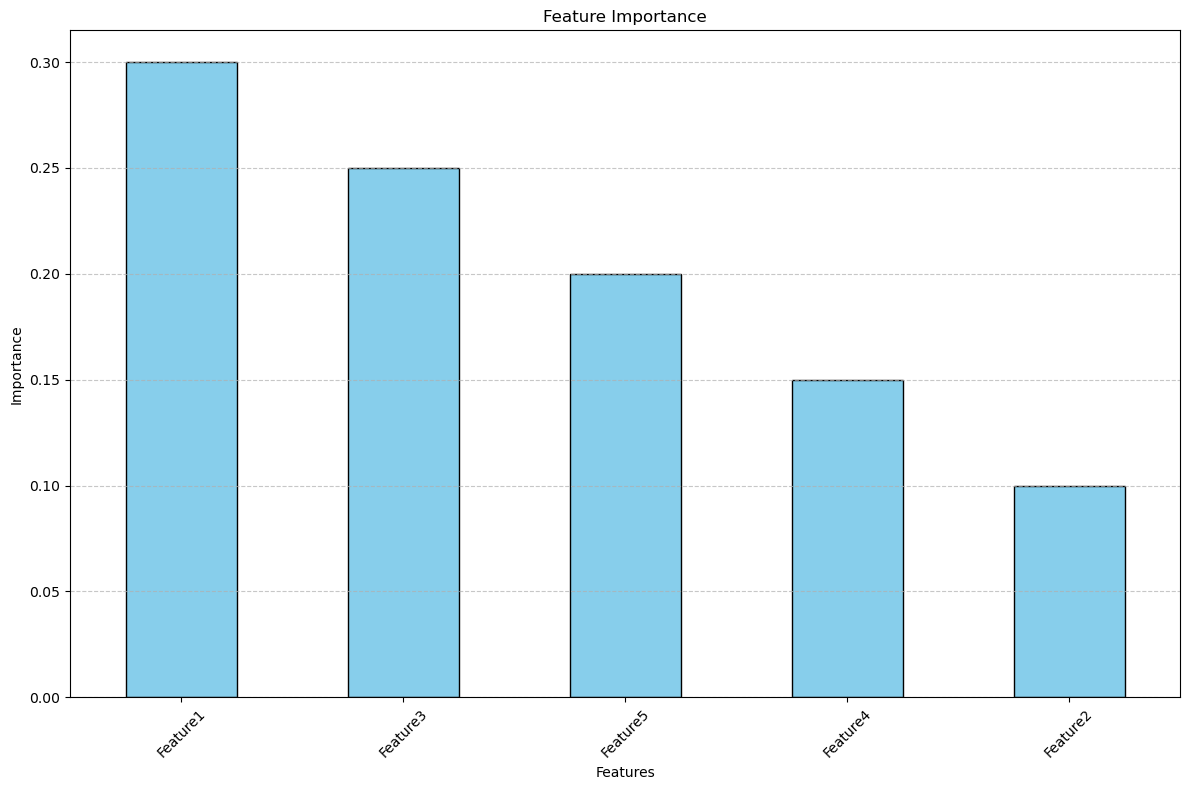

In [28]:
# # Feature Importance
# importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
# plt.figure(figsize=(10, 6))
# importances.plot(kind='bar')
# plt.title('Feature Importance')
# plt.show()




import matplotlib.pyplot as plt
import pandas as pd

# Example: Feature importances (replace these with your actual values)
importances = pd.Series([0.3, 0.1, 0.25, 0.15, 0.2], index=['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5']).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
importances.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Grid lines
plt.tight_layout()  # Adjust layout
plt.show()
